In [5]:
!pip install ultralytics
!pip install supervision

# Install Yolo

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.6/8062.4 GB disk)


# Import data from robo flow 

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wrNmIilZnQ3q9s6VsVxd")
project = rf.workspace("kenyan-coins-data").project("openvission")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.51, to fix: `pip install ultralytics==8.0.196`


# Configure the direction path for training data

In [8]:
import yaml

# Load the YAML file
with open('/kaggle/working/Openvission-2/data.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Print the current content
print(config)

{'names': ['Ksh 1', 'Ksh 10', 'Ksh 20', 'Ksh 5'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'openvission', 'url': 'https://universe.roboflow.com/kenyan-coins-data/openvission/dataset/2', 'version': 2, 'workspace': 'kenyan-coins-data'}, 'test': '../test/images', 'train': 'Openvission-2/train/images', 'val': 'Openvission-2/valid/images'}


In [9]:
# Make changes to the configuration
config['test'] ='/kaggle/working/Openvission-2/test/images'
config['train']='/kaggle/working/Openvission-2/valid/images'
config['val'] ='/kaggle/working/Openvission-2/train/images'
# Save the changes back to the YAML file
with open('/kaggle/working/Openvission-2/data.yaml', 'w') as file:
    yaml.safe_dump(config, file)

# Train the model

In [10]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/Openvission-2/data.yaml epochs=2000 imgsz=640

100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 171MB/s]
Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Openvission-2/data.yaml, epochs=2000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

# Display the results From the model

In [11]:
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()

# Confusion matrix

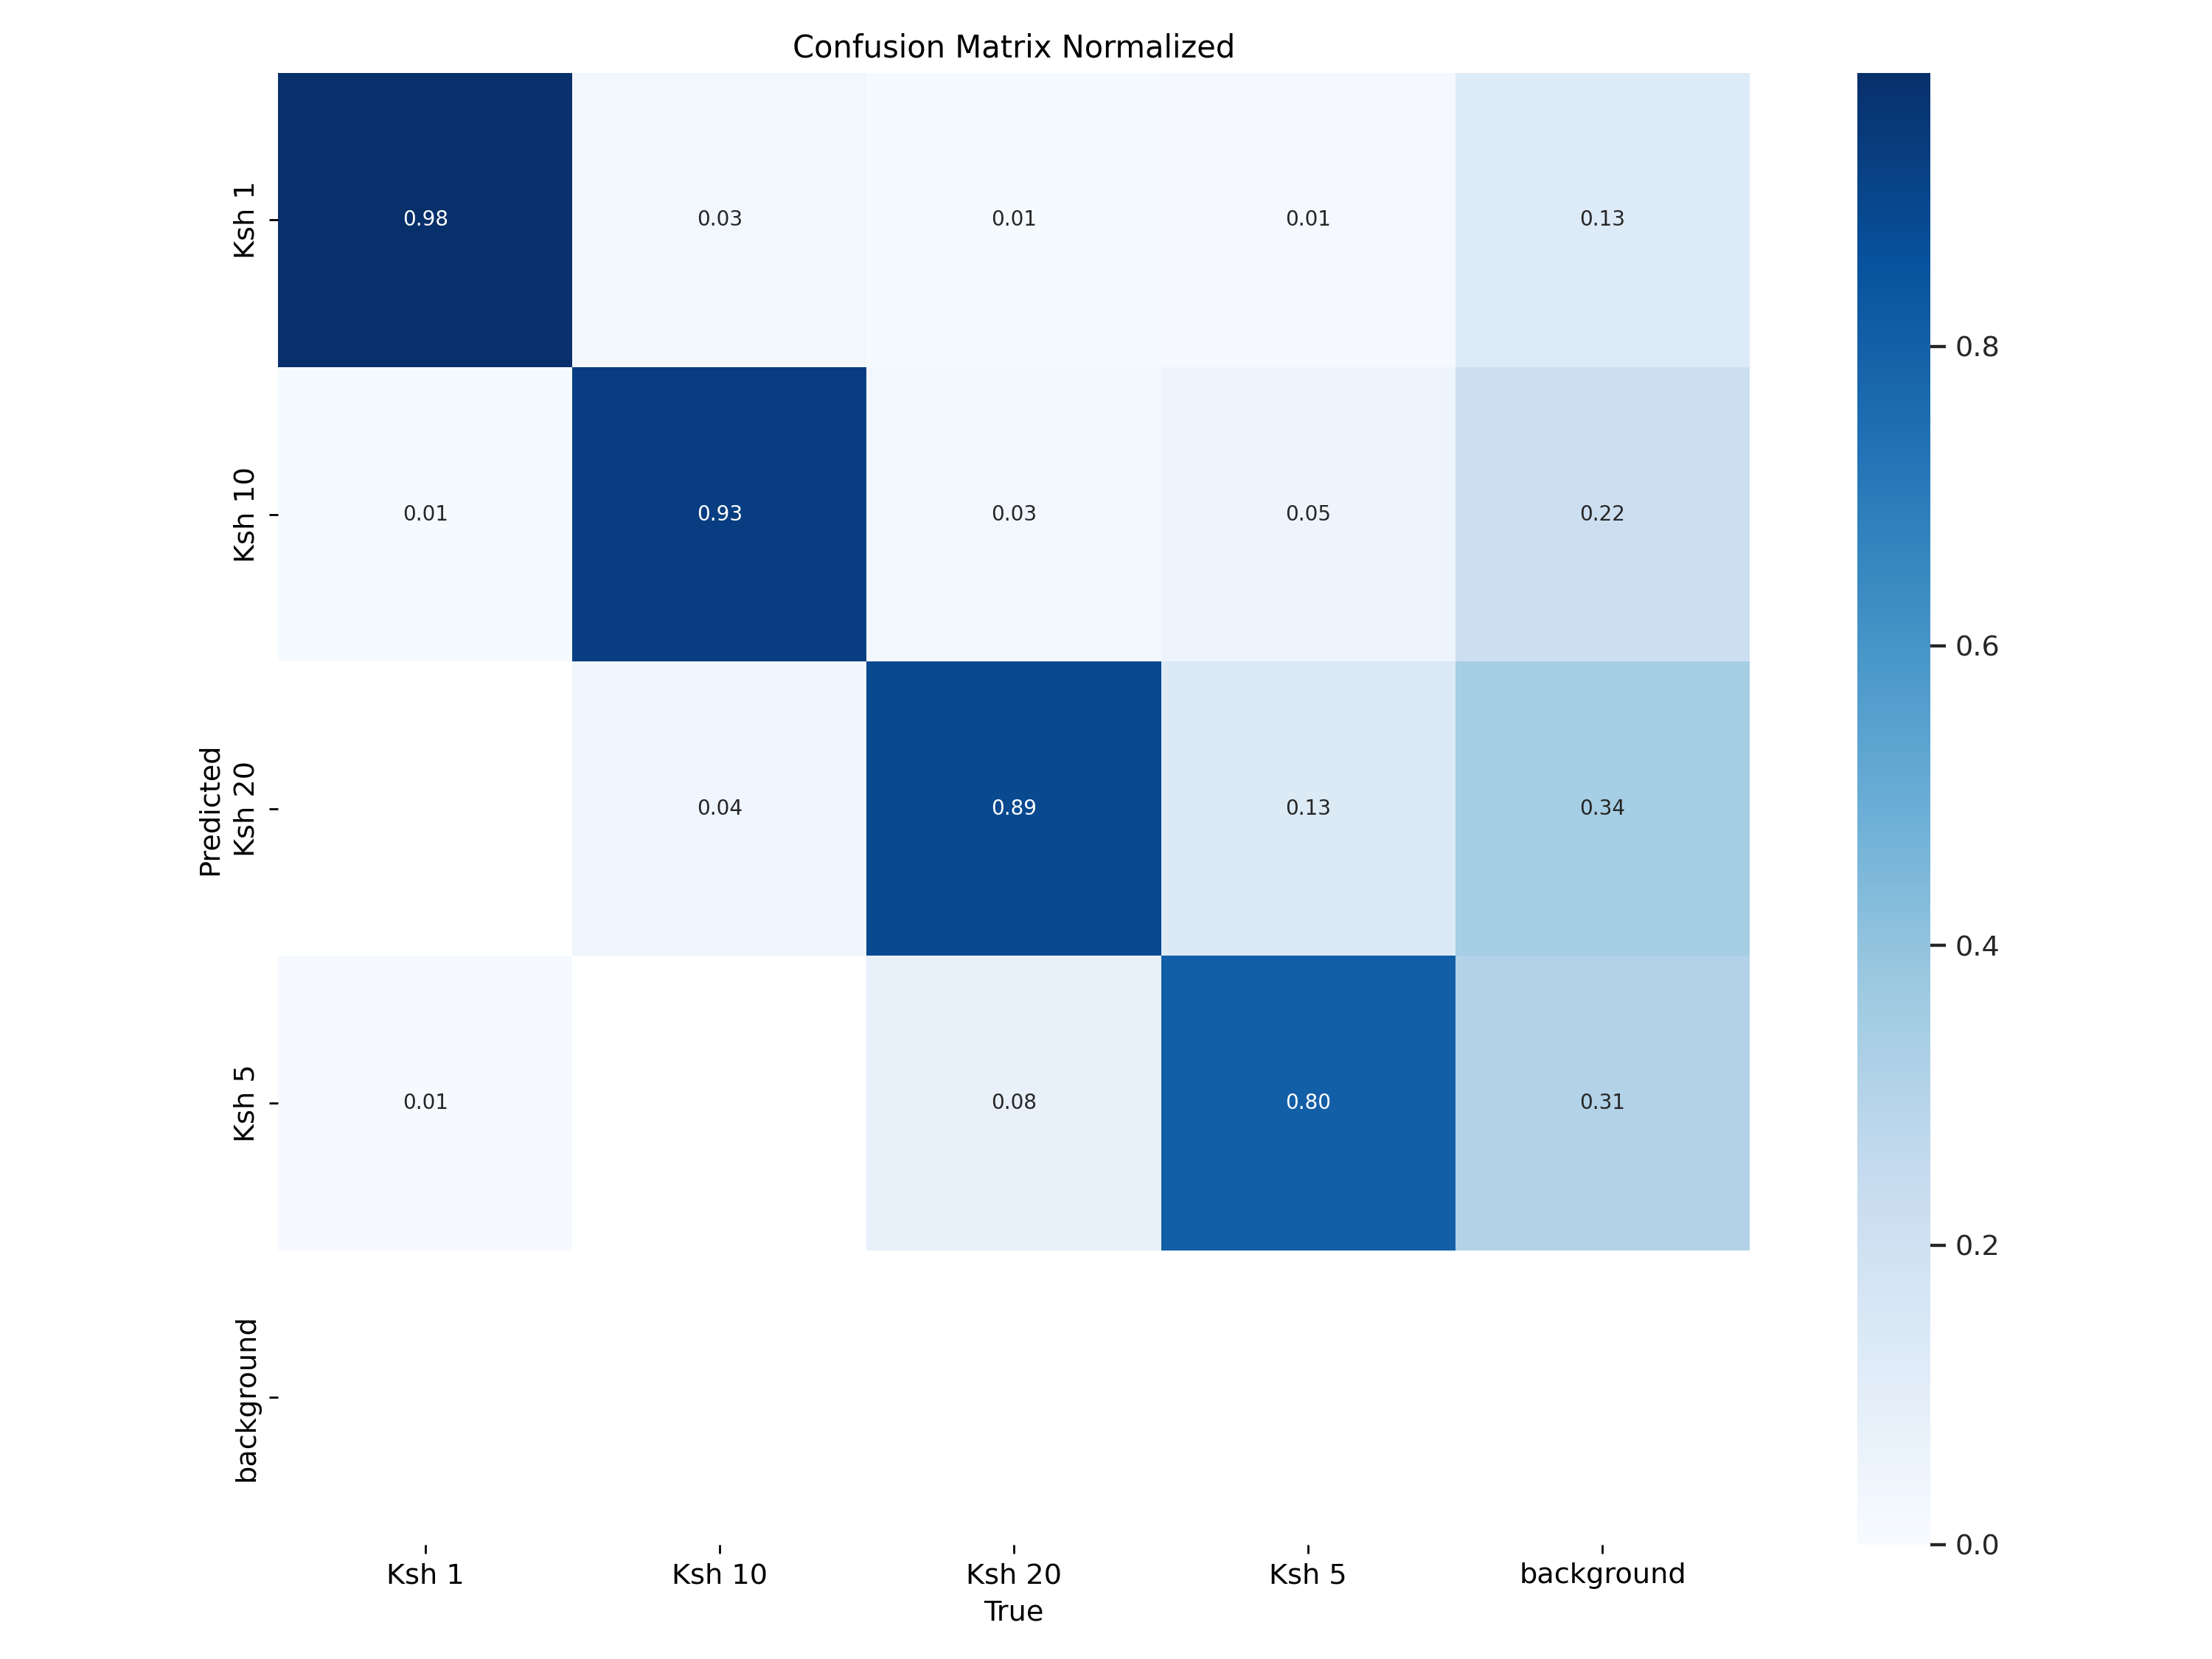

In [12]:
Image(filename= f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

# Train results

In [ ]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

# Take a look at the validation 

In [14]:
!yolo task= detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data= /kaggle/working/Openvission-2/data.yaml

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Openvission-2/train/labels.cache... 510 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        510       3294      0.909      0.937      0.943      0.676
                 Ksh 1        441       1320      0.965      0.991      0.988       0.72
                Ksh 10        270        897      0.945      0.939      0.967      0.694
                Ksh 20        363        612      0.857      0.941        0.9      0.645
                 Ksh 5        285        465      0.868      0.877      0.919      0.646
Speed: 0.7ms preprocess, 2.2ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Take a look at the predition mode

In [15]:
!yolo task= detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.5  source= /kaggle/working/Openvission-2/test/images

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/24 /kaggle/working/Openvission-2/test/images/20240703_153137_jpg.rf.7faee70352f50e81ff7b9646a9c824b2.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 7.1ms
image 2/24 /kaggle/working/Openvission-2/test/images/20240703_153147_jpg.rf.aaf6da5408f4d2803a4a4f1883b10062.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 7.4ms
image 3/24 /kaggle/working/Openvission-2/test/images/20240703_153248_jpg.rf.91a66b687d36a475a960e675a19476ce.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 1 Ksh 20, 2 Ksh 5s, 6.3ms
image 4/24 /kaggle/working/Openvission-2/test/images/20240703_153407_jpg.rf.8bcc9e12e9b114b5ceeb0af0137dae1f.jpg: 640x640 1 Ksh 1, 7 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 6.0ms
image 5/24 /kaggle/working/Openvission-2/test/images/20240703_153809_jpg.rf.1d28764452c766811275bc16bc9d23b6.jpg: 640x640 3 Ksh 10s, 6.7ms
image 6/24 /k

# Use a for loop to show the predicted images 

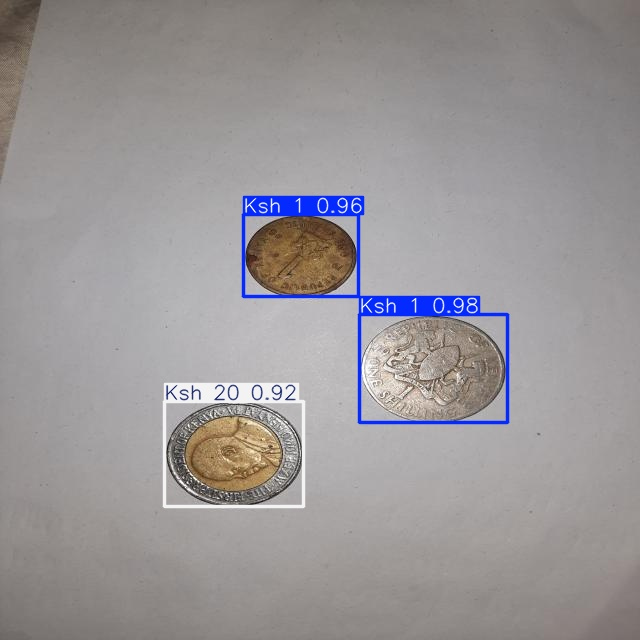

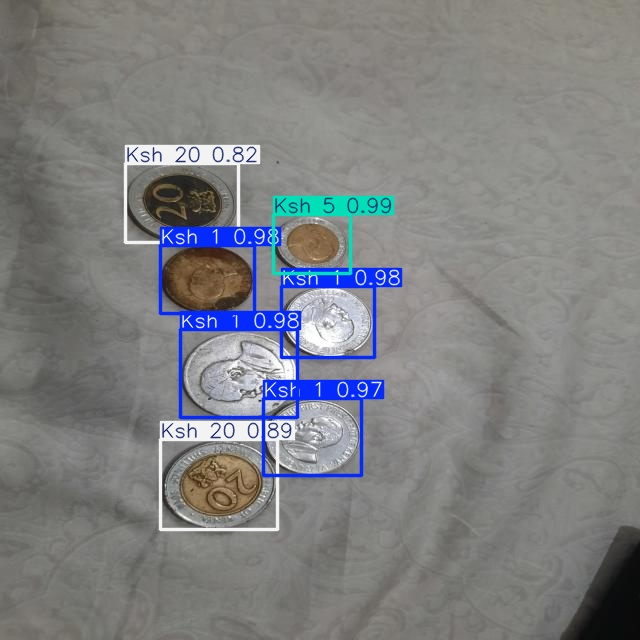

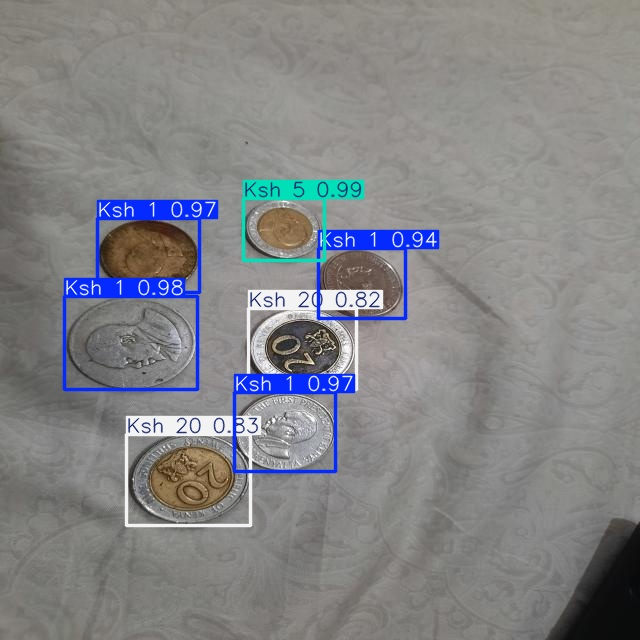

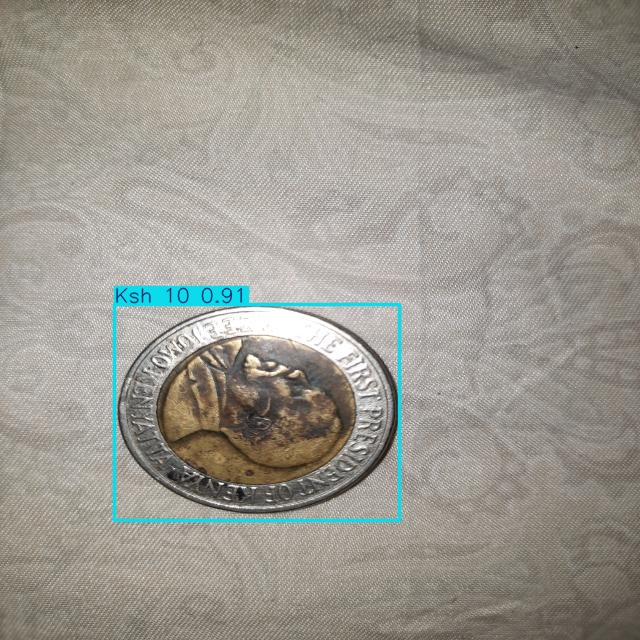

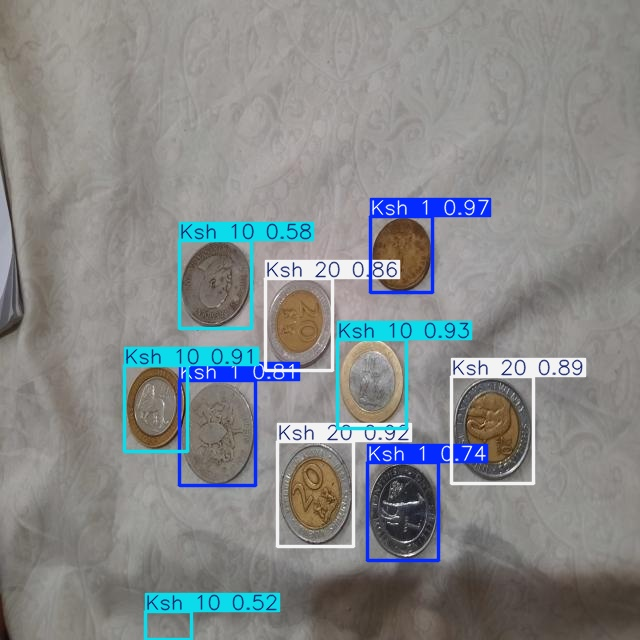

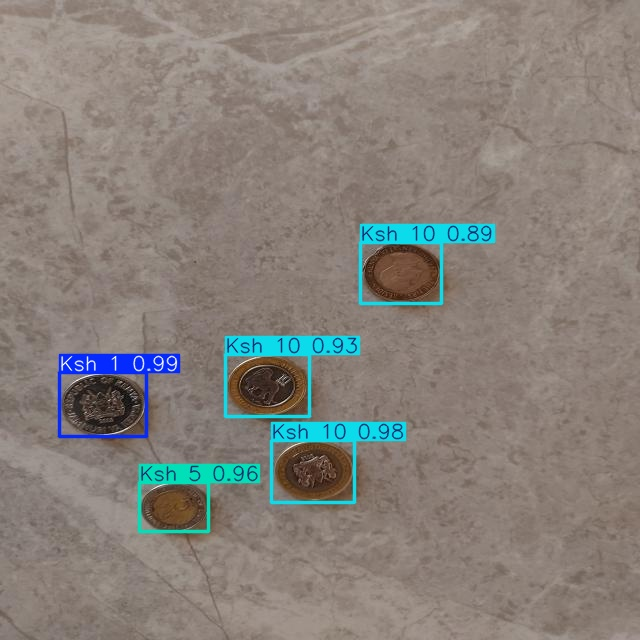

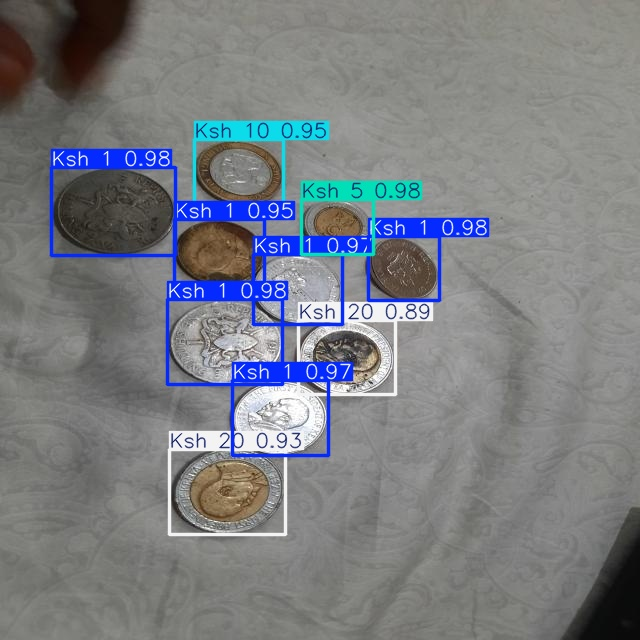

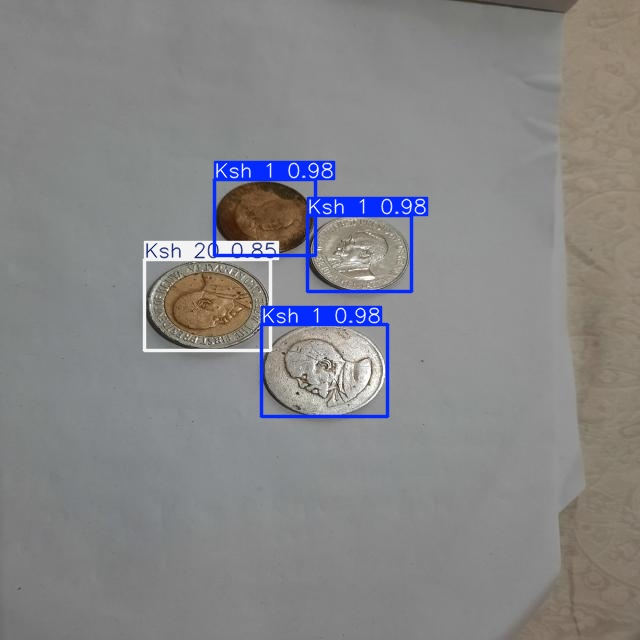

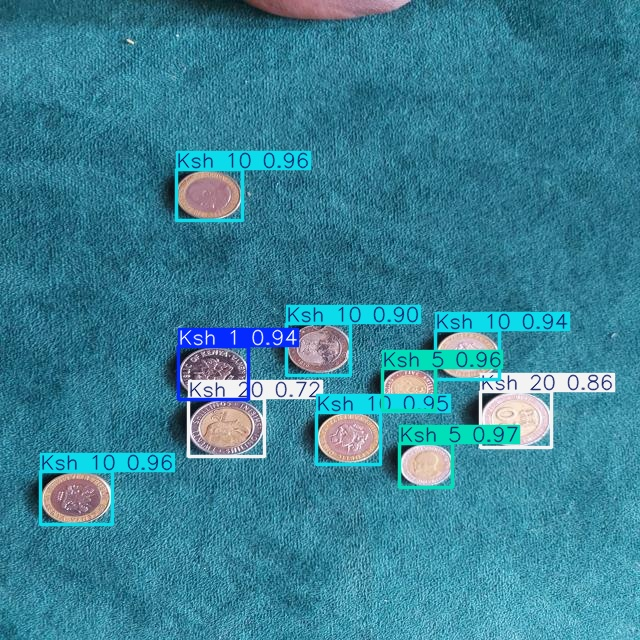

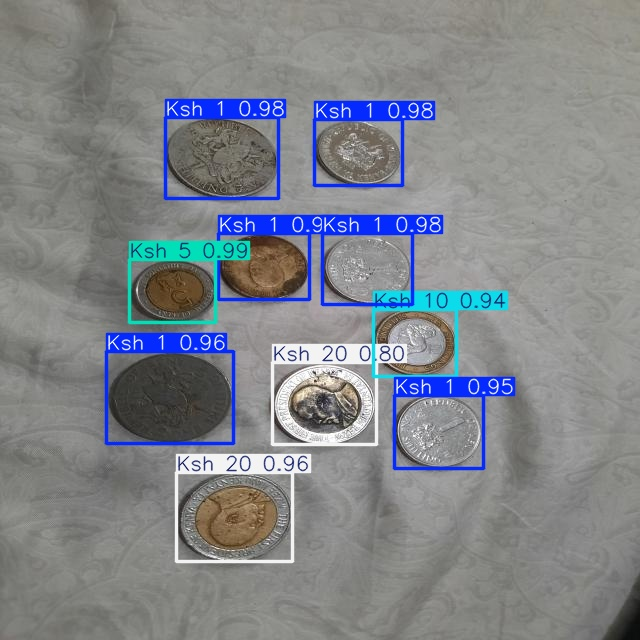

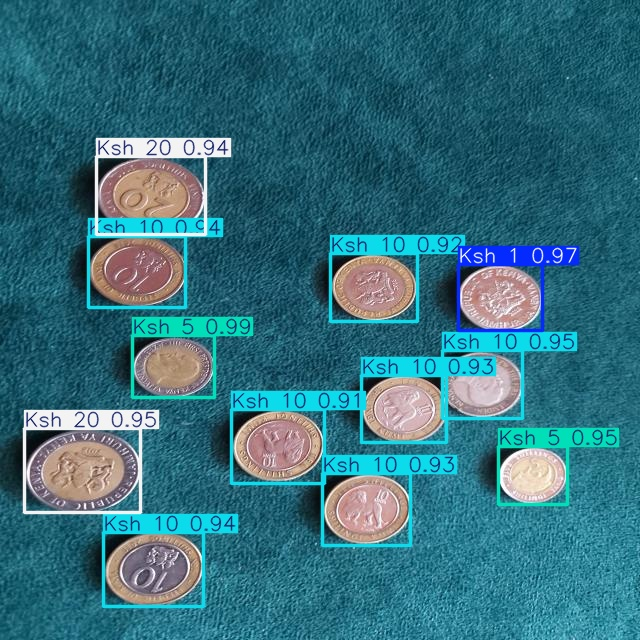

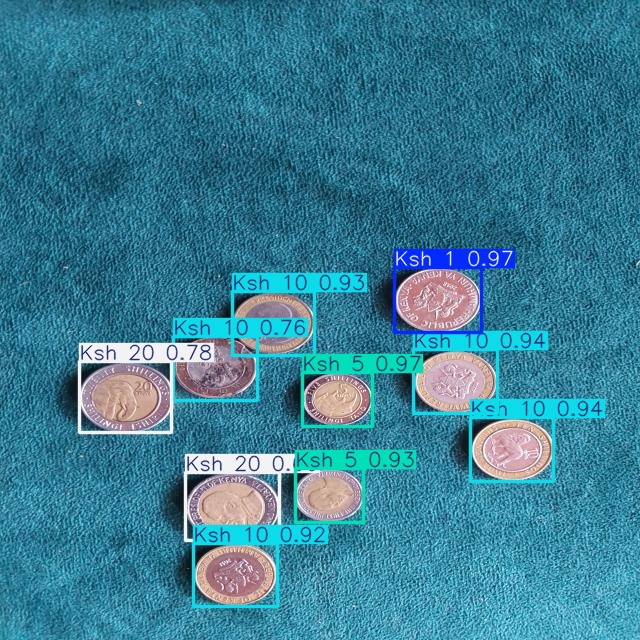

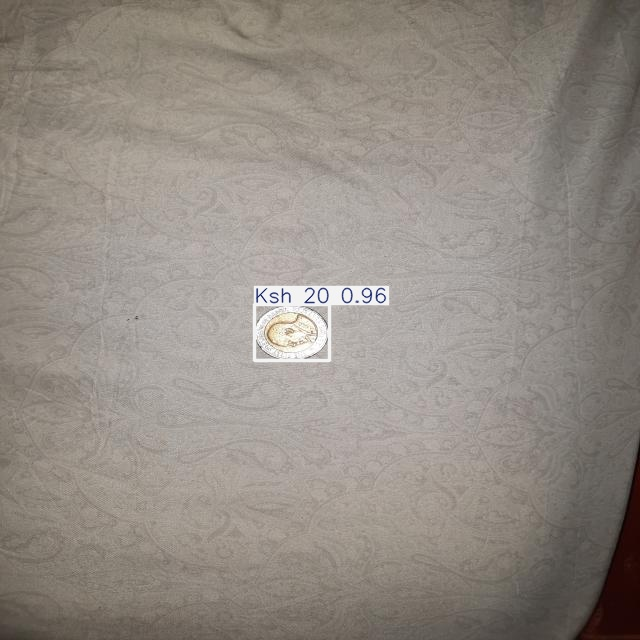

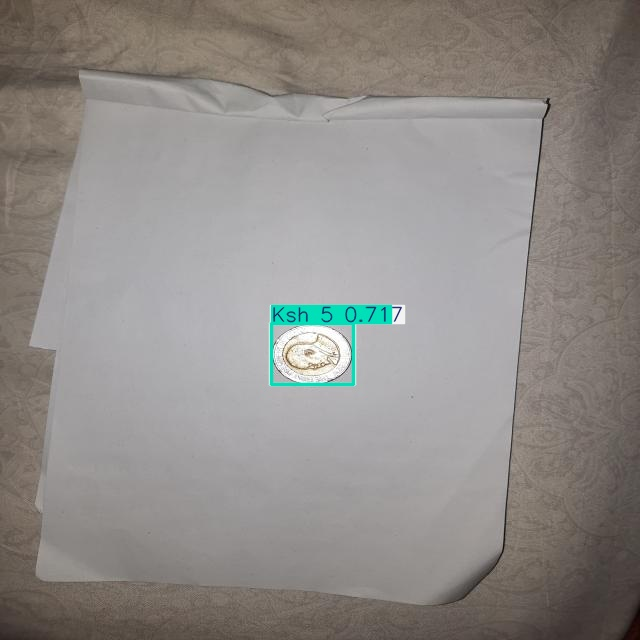

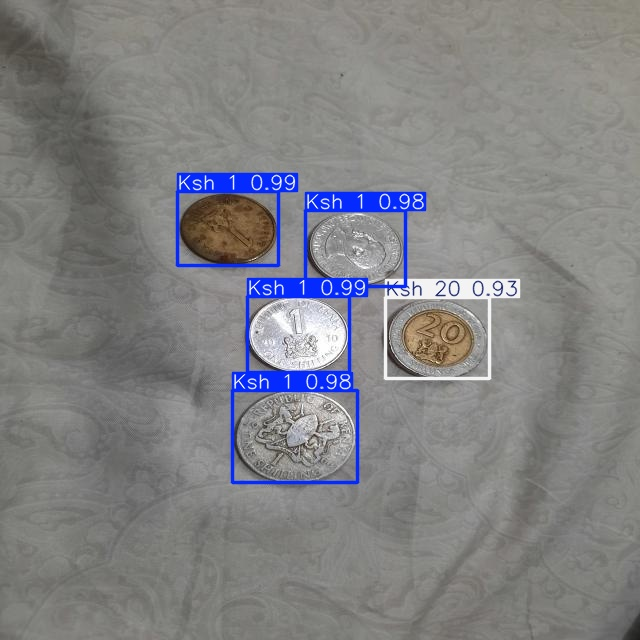

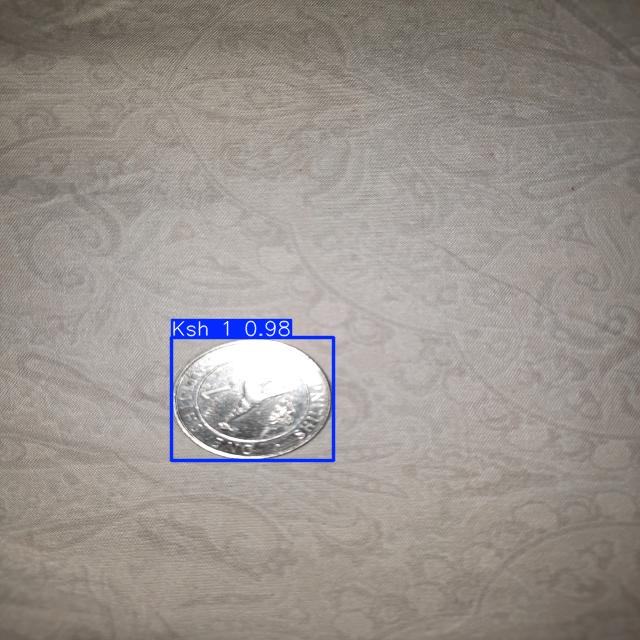

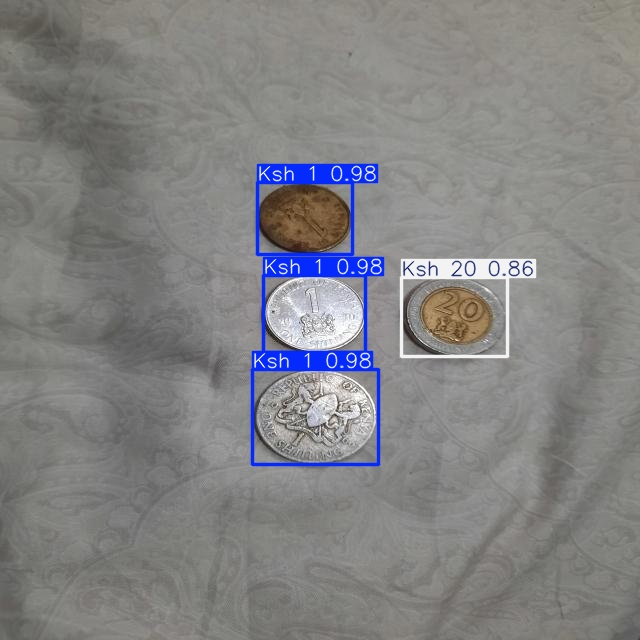

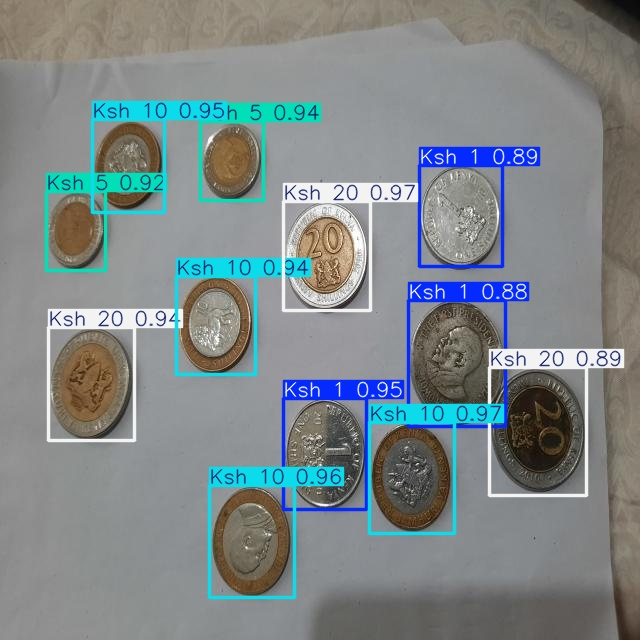

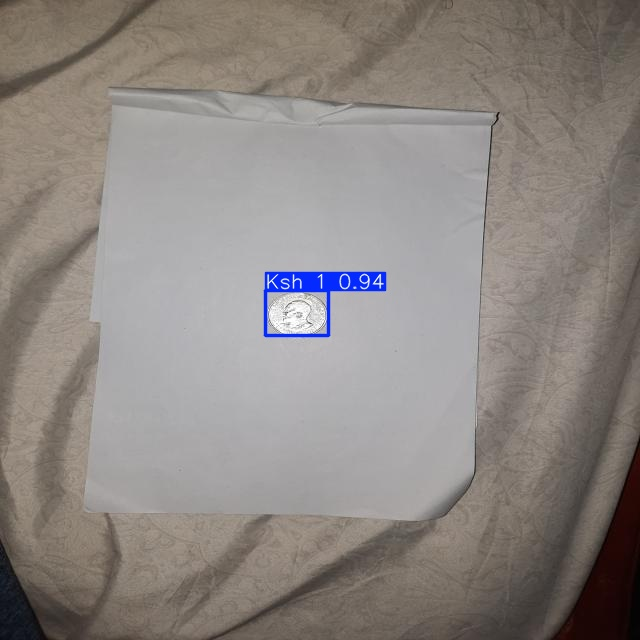

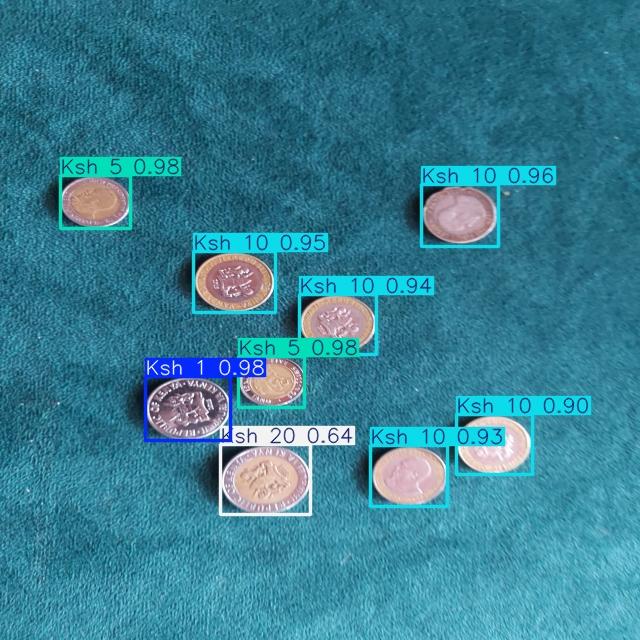

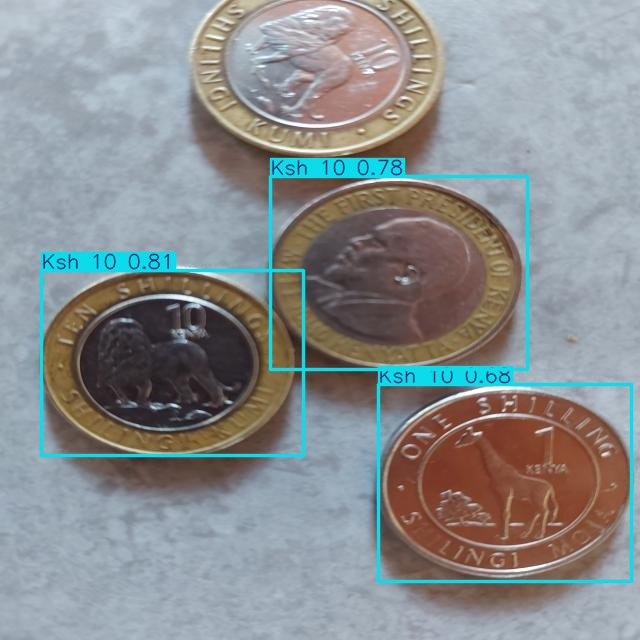

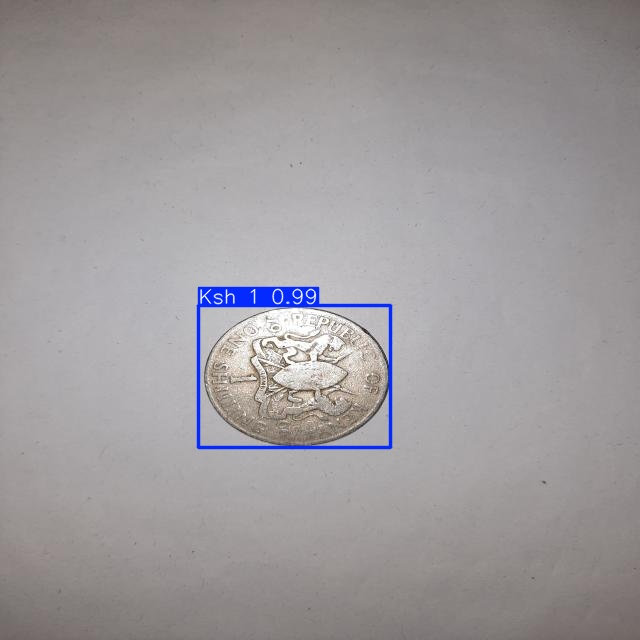

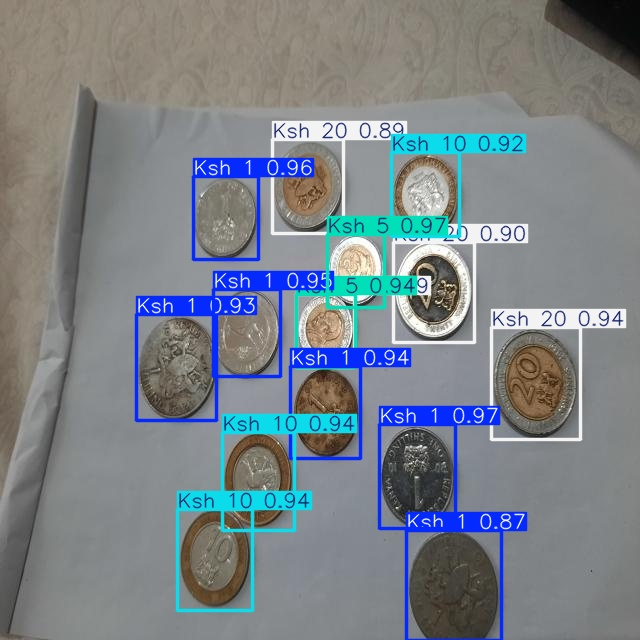

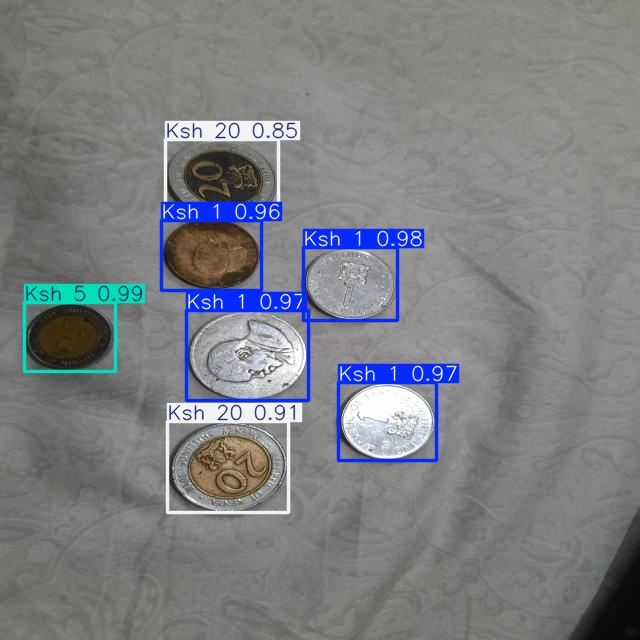

In [16]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path,height=600))
    print('\n')

## Dectect objetcs

In [17]:
#can specify weights_filename, default is "weights/best.pt"
version = project.version(2)

In [18]:
# !pip uninstall ultralytics==8.2.50 -y
# !pip install ultralytics==8.0.196

In [19]:
#example1 - directory path is "training1/model1.pt" for yolov8 model
version.deploy("yolov8", "/kaggle/working/runs/detect/train/weights", "best.pt")

Dependency ultralytics==8.0.196 is required but found version=8.2.51, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/kenyan-coins-data/openvission/2
Share your model with the world at: https://universe.roboflow.com/kenyan-coins-data/openvission/model/2
